## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
# read csv dataset
df = pd.read_csv('ab_data.csv')

# check what fields the dataset has
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [6]:
# check the size (rows and columns) of dataset using `shape`
initial_number_rows = df.shape[0]
print('the number of rows in the dataset:', initial_number_rows)

the number of rows in the dataset: 294478


c. The number of unique users in the dataset.

In [7]:
# Identifying the number of unique users in the dataset using `nunique` 
user_unique = df.nunique()['user_id']
print('the number of unique users in the dataset:', user_unique)

the number of unique users in the dataset: 290584


d. The proportion of users converted.

In [8]:
# we can find the proportion of user converted by using mean as in converted columns values are either `1` of `0`
# anothe approach is to get `sum` and divide by number of rows but `mean` gives the same result
user_conv = df['converted'].mean()
print("Users converted proportion: {:0.4f}%".format(user_conv))

Users converted proportion: 0.1197%


e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
# treatment is not aligned with new_page 
treat_old = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Treatment group lands on old_page: {}".format(treat_old.shape[0]))

#  control is not aligned with old_page
contr_new = df.query("group == 'control' and landing_page == 'new_page'")
print("Control group lands on new_page: {}".format(contr_new.shape[0]))

# total number of mistakenly aligned rows 
total_wrong_rows = treat_old.shape[0] + contr_new.shape[0]
print("Total number of mistakenly aligned rows: {}".format(total_wrong_rows))

Treatment group lands on old_page: 1965
Control group lands on new_page: 1928
Total number of mistakenly aligned rows: 3893


In [10]:
# to check dataset mean, stdeviation, min-max and the quartiles
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


f. Do any of the rows have missing values?

In [11]:
# check missed values and values types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [12]:
# the number of rows in the dataset
df.shape[0]

294478

We see that all columns have the same number of rows and proper value types.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

If page doesn't match the group we can't be sure what is correct: page or the group, so we need to drop mismatched rows

In [13]:
# To drop rows with control group and new page
df.drop(contr_new.index, inplace = True)

In [14]:
# To drop rows with treatment group and old page
df.drop(treat_old.index, inplace = True)

In [15]:
# to check that number of rows and types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [16]:
# to confirm that we removed exact number of mismatched rows
print('initial number of rows', initial_number_rows)
print('new number of rows', df.shape[0])
print('the difference between old and new number of rows',initial_number_rows - df.shape[0] )
print('total wrong rows', total_wrong_rows)

initial number of rows 294478
new number of rows 290585
the difference between old and new number of rows 3893
total wrong rows 3893


In [17]:
# to create a new dataset without mistakenly aligned users

df.to_csv('ab_data_cleaned.csv', index=False)

In [18]:
# to read new cleaned dataset into dataframe df2
df2 = pd.read_csv('ab_data_cleaned.csv')

In [19]:
# to check that we don't have any mismatched rows anymore
print('control group and new page:', df2.query("group == 'control' and landing_page == 'new_page'").shape[0])
print('treatment group and old page:', df2.query("group == 'treatment' and landing_page == 'old_page'").shape[0])

control group and new page: 0
treatment group and old page: 0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [20]:
# to check number of unique users in cleaned dataset `df2`
user_unique_df2 = df.nunique()['user_id']
print('the number of users in cleaned dataset:', user_unique_df2)

the number of users in cleaned dataset: 290584


In [21]:
# to check number of non-null rows and types in cleaned dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
# to find duplicated `user_id` using `.duplicated()`
num_duplicated = df2[df2['user_id'].duplicated()]['user_id']
print('duplicated user ID:', num_duplicated)

duplicated user ID: 2862    773192
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [23]:
# to check all information in duplicated rows
dupl_search = df2['user_id']
df2[dupl_search.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [24]:
# these two rows differ by timestamp. We'll take the first one:
# 2017-01-09 05:37:58.781806
time_dupl = "2017-01-09 05:37:58.781806"

# Create a new dataframe called df that includes all rows where the value 
# of a cell in the timestamp column does not equal "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != "2017-01-09 05:37:58.781806"]

In [25]:
# We need to check that we removed a duplicate row
# if it's empty then we removed it

df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted


Yes indeed we don't have duplicate rows anymore.

In [26]:
# check the new dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


We see that total number of rows decreased by 1 from 290585 to 290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [27]:
# in order to calculate the probability of an individual converting regardless of the page they receive
# we use the same formula as at the beginning of this analysis

user_conv_df2 = df2['converted'].mean()
print("Users converted proportion: {:0.4f}".format(user_conv_df2))

Users converted proportion: 0.1196


In [28]:
# to compare first and second probability of conversion

delta_conv = user_conv_df2 - user_conv
print('the change in probability of conversion between initial and cleaned dataset', delta_conv)

the change in probability of conversion between initial and cleaned dataset -6.21063110588e-05


As we see the difference is minimal due to the small number of deleted (cleared) rows comparing to the total number of rows

b. Given that an individual was in the `control` group, what is the probability they converted?

In [29]:
# As converted described as 1 and not converted as 0, 
# we can check `mean` of converted column again to find the probability
df2.groupby('group').describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

c. Given that an individual was in the `treatment` group, what is the probability they converted?

For the control group, the probability they converted: 0.1204

For the treatment group, the probability they converted: 0.1188

d. What is the probability that an individual received the new page?

In [30]:
# number of users received a new page
new_page_num = df2.query("landing_page == 'new_page'").shape[0]

# total number of users regardless of page
total_num = df2.shape[0]

# the probability that an individual received the new page
prob_new_page = new_page_num/total_num

print("The probability that an individual received the new page: {:0.4f}.".format(prob_new_page))

The probability that an individual received the new page: 0.5001.


In order to make analysis for how long the test has been conducted we need to get information about year and month

In [31]:
# to get month and year from the timestamp column
df2['date'] = pd.to_datetime(df2['timestamp'])

df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2.head()

,user_id,timestamp,group,landing_page,converted,date,year,month
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21 22:11:48.556739,2017,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12 08:01:45.159739,2017,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11 16:55:06.154213,2017,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08 18:28:03.143765,2017,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21 01:52:26.210827,2017,1


In [32]:
# to check the year 
df2.groupby('year').count()

,user_id,timestamp,group,landing_page,converted,date,month
year,,,,,,,
2017,290584,290584,290584,290584,290584,290584,290584


As we see all 290594 users were analysed in one year: 2017

In [33]:
# to check months
df2.groupby('month').count()

,user_id,timestamp,group,landing_page,converted,date,year
month,,,,,,,
1,290584,290584,290584,290584,290584,290584,290584


As we see all 290594 users were analysed in one month: 1

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**

After cleaning the dataset and calculation of probabilities we see, that
* for the treatment group, the probability they converted is 0.1188
* for the control group, the probability they converted is 0.1204
* the control group leads to more conversions, but the difference is very small.
* we haven't checked other factors affect the convertion rate:
 - this test has been conducted during one month January which could affect user's response;
 - the gender/age/the theme of websites analysis of users;
 - the regional differences for users;
 - traditional bias agains changes

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

The null hypothesis is a hypothesis of "no difference" e.g. no difference between conversion rate in control and treatment group.

The alternative hypothesis $H_{1}$ is the hypothesis that conversion in treatment group is higher.

 

The Null $H_{0}$ and alternalive $H_{1}$ Hypotheses are:

$H_{0}$ : $p_{old}$ >=  $p_{new}$

$H_{1}$ : $p_{old}$ <  $p_{new}$

significance level (Type I error) α = 5%


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [34]:
# the convert rate for p_new under the null hypothesis is:

p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [35]:
# the convert rate for p_old under the null hypothesis is the same as $p_{new}$:

p_old = df2['converted'].mean()
p_old

0.11959708724499628

The calculation are the same so they are equal to the converted rate in ab_data.csv regardless of the page.

c. What is $n_{new}$?

In [36]:
# to calculate n_new the number of rows in treatment group (new_page for landing_page)
n_new = df2.query("landing_page == 'new_page'").shape[0]
print('The number of treatment group (new page) users: ', n_new)

The number of treatment group (new page) users:  145310


d. What is $n_{old}$?

In [37]:
# to calculate n_old the number of rows in control group (old_page for landing_page)
n_old = df2.query("landing_page == 'old_page'").shape[0]
print('The number of control group (old page) users: ', n_old)

The number of control group (old page) users:  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [38]:
# we need to make a simulation and get an array with n_new positions 1 and 0,
# so we need to use numpy method for random simulation
# because it's binomial distribution we can use 
# numpy.random.binomial(n, p, size=None)
new_page_converted = np.random.binomial(1, p_new, size=n_new)
print("New page: the length of new 1's and 0's  array:", new_page_converted.shape[0])
print('New page: to check that we indeed have a new array: ', new_page_converted.view())
print("New page: the sum of 1's and 0's in new array: ", sum(new_page_converted))

New page: the length of new 1's and 0's  array: 145310
New page: to check that we indeed have a new array:  [1 0 1 ..., 0 0 0]
New page: the sum of 1's and 0's in new array:  17159


In [39]:
# the other way to run a random simulation is:
# numpy.random.choice(a, size=None, replace=True, p=None)
# a -  a random sample is generated from its elements, so we use [0,1]
# size - Output shape, we use size = n_new
# p - for p we are giving an array of probabilities p_new = convert(0), (1-p_new) = not to convert(0))

new_page_converted_another_method = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
print('New page other method: the new array: ',new_page_converted_another_method.view())
print('New page other method: the lenght of the new array: ', new_page_converted_another_method.shape[0])

New page other method: the new array:  [0 0 0 ..., 0 0 0]
New page other method: the lenght of the new array:  145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [40]:
# using the same formula and logic as for new_page_converted only changing
# size for n_old and p for p_old

old_page_converted = np.random.binomial(1, p_old, size=n_old)
print("Old page: the length of new 1's and 0's  array:", old_page_converted.shape[0])
print('Old page: to check that we indeed have a new array: ', old_page_converted.view())
print("Old page: the sum of 1's and 0's in new array: ", sum(old_page_converted))

Old page: the length of new 1's and 0's  array: 145274
Old page: to check that we indeed have a new array:  [0 1 0 ..., 1 0 0]
Old page: the sum of 1's and 0's in new array:  17318


In [41]:
# to calculate new probability of conversion for new simulated array for a new page
p_new_conv = new_page_converted.mean()
print('the new probability of convirsion for new new_page array: ', p_new_conv)

the new probability of convirsion for new new_page array:  0.118085472438


In [42]:
# to calculate new probability of conversion for new simulated array for an old page
p_old_conv = old_page_converted.mean()
print('the new probability of convirsion for new old_page array: ', p_old_conv)

the new probability of convirsion for new old_page array:  0.119209218442


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [43]:
# to calculate the difference between different conversion probabilities
p_diff = p_new_conv  - p_old_conv

print('the difference between different conversion probabilities: ', p_diff)

the difference between different conversion probabilities:  -0.00112374600416


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [44]:
# in order to simulate 10 000 p_diff values we need to repeat calculation 10 000 timeas 
# and push new numbers into array `p_diffs`

p_diffs = []


new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted 


In [45]:
# convert to numpy array in order to be able numpy array methods
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

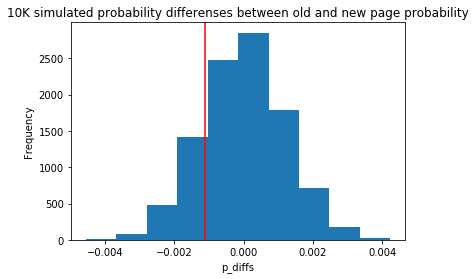

In [46]:
# to plot histogram of new p_diff array probabilities
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.axvline(x= p_diff, color="red");
plt.title('10K simulated probability differenses between old and new page probability');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
# to calculate actual difference in initial array

actual_diff = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()
actual_diff

-0.0015790565976871451

In [48]:
# to calculate a p-value
(actual_diff < p_diffs).mean()

0.90339999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

We were calculating the p-value: the probability, under the null hypothesis, $H_{0}$, of obtaining a result equal to or more extreme than what was actually observed.
We plotted the histogram for the sampling distribution under the null hypothesis. 

As p-value is significantly bigger than the chosen significance level (5%) then we fail to reject the null hypothesis.
When we calculated the conversion rate for control and treatment groups we saw that they are almost the same.
For the new and old page we see that old page provides a slightly better conversion rate than new page, so we have to keep old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [49]:
import statsmodels.api as sm
# we are calculating the number of conversions for each page `sum` of 1's and 0's in converted column
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])

# to calculate the size of each group
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]
print('the number of conversion in control group: ', convert_old)
print('the number of conversion in treatment group: ', convert_new)
print('the size of control group: ', n_old)
print('the size of treatment group: ', n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


the number of conversion in control group:  17489
the number of conversion in treatment group:  17264
the size of control group:  145274
the size of treatment group:  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [50]:
# to compute test statistic and p-value I use
# proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)

# I used two-sided test, as it has enough power and I don't need to run one-sided test
# single sided test would increase p but z-score would be the same

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print('z_score:', z_score)
print('p_value two-sided test:', p_value)

# if I used single-sided test that I'd get the same p-value as above 
z_score_single_sided, p_value_single_sided = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print('p_value single-sided test:', p_value_single_sided)


z_score: 1.31092419842
p_value two-sided test: 0.189883374482
p_value single-sided test: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [51]:
from scipy.stats import norm
# to check how significant our z-score is
# cumulative distribution function (cdf) is the probability 
# that the variable takes a value less than or equal to z-score
print('Cumulative distribution function:', norm.cdf(z_score))

# to check what our critical value at 95% confidence is
# we need to calculate the percent point function
# which is the inverse of the cumulative distribution function

print('The percent point function for two-sided test', norm.ppf(1-(0.05/2))) 

Cumulative distribution function: 0.905058312759
The percent point function for two-sided test 1.95996398454


In [52]:
# the cumulative distribution function could be also calculated using 
# Python integrated the error function math.erf(x)

from math import *
def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

print(phi(z_score))

0.9050583127590244


**Answer**

The z-score 1.31 is less than critical value 1.96,

P-value is the same as in above calculation for single-sided test,
so we fail to reject the null hypothesis, and keep the old page.

There could be a slight difference due to 10000 simulations.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

Because the conversion outcome is categorical in nature (yes(1)/no(0))  we use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [53]:
# creating an `intercept` column
df2['intercept']=1

#creating dummy variables for `group` column
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

# creating `ab_page` column, in case of treatment group it has value 1
df2['ab_page'] = df2['treatment']


In [54]:
# to check our dataset reflects the correct groups 
# and ab_page shows 1 for treatment group

df2.head()

,user_id,timestamp,group,landing_page,converted,date,year,month,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21 22:11:48.556739,2017,1,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12 08:01:45.159739,2017,1,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11 16:55:06.154213,2017,1,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08 18:28:03.143765,2017,1,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21 01:52:26.210827,2017,1,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [55]:
import statsmodels.api as sm

# instantiating the model
# for the two columns we use `intercept` and `ab_page`

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])



d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [56]:
# fit the model and check summary
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        15:25:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [57]:
# np.exp(result.params)
np.exp(-0.0150)

0.98511193960306265

**Answer**

- For ab_page p-value os 0.19 which is equal p-value received from `sm.stats.proportions_ztest` for two-sided test.
It's still large than significance level (0.05), so it confirms that there is no evidence which support the rejection of the null hypothesis. 

- For treatment group convertion is 0.985 times likely than for control group which confirms our calculation of conversion rates.

It means that conversion rate is not better for the new page, so we keep the old page.


In [58]:
df2.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [59]:
# to calculate the rate conversion rate for treatment group to conversion rate for control group
0.1188/0.12038

0.9868748961621532

As we see the rate is almost the same as in the logit model.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**

The p-value for ab_page 0.19 is significantly bigger that the Type I error (α=5%), it confirms our decision to fail to reject $H_{0}$ hypothesis. 

The value is almost the same to the p-value from the Part II using `sm.stats.proportions_ztest` for a two-sided test which is usually has less power than single-sided test, but still enough to fail to reject $H_{0}$ hypothesis ($H_{0}$ hypothesis is the hypothesis that old page has the same or better conversion rate than new page).

The slight difference is caused by 10000 simulations.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

We have to add additional factors as:
- Time of the year;
- demographic factors;
- the length of the test;
- the method how and during which period the conversion  (yes or no) was measured.

But additional variable could lead to multicollinearity, when the model includes multiple factors that are correlated not just to the response variable, but also to each other.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [60]:
# to read new file `countries.csv`
df_countries = pd.read_csv('./countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [61]:
# to check users for each country
df_countries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [62]:
# to create new dataset which combines country from `df_countries` dataset with cleaned `ab_data` dataset based on `user_id`
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,date,year,month,intercept,control,treatment,ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,2017-01-14 23:08:43.304998,2017,1,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,2017-01-23 14:44:16.387854,2017,1,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,2017-01-16 14:04:14.719771,2017,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,2017-01-22 03:14:24.763511,2017,1,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,2017-01-16 13:14:44.000513,2017,1,1,0,1,1


In [63]:
# to created dummy variable in the combined dataset
df3['intercept'] = 1
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3['country'])
df3.head()

,country,timestamp,group,landing_page,converted,date,year,month,intercept,control,treatment,ab_page,US,UK,CA
user_id,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,2017-01-14 23:08:43.304998,2017,1,1,1,0,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,2017-01-23 14:44:16.387854,2017,1,1,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,2017-01-16 14:04:14.719771,2017,1,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,2017-01-22 03:14:24.763511,2017,1,1,1,0,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,2017-01-16 13:14:44.000513,2017,1,1,0,1,1,0,1,0


In [64]:
# to instantiate the model
logit_mod_countries = sm.Logit(df3['converted'], df3[['intercept', 'US', 'UK']])

# to fit the model and check the summary
results_countries = logit_mod_countries.fit()
results_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        15:26:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**We see that for countries p-value is much bigger that significance level, and there is no much difference between countries**

In [66]:
# to exponentiate the result, so we'd get odds which are easier to interpret
np.exp(results_countries.params)

intercept    0.135779
US           0.960018
UK           1.009966
dtype: float64

In [67]:
# to remind ourselves the conversion rates for different groups

df3.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [68]:
# to check conversion rates by countries
df3.groupby('country').mean()['converted']

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

**Conclusion**

* As we see, the regression model also confirms that there is very little difference in conversion rate between old and new page in favor of the old page. 
* The conversion rate also variates very insignificantly between countries, so this factor doesn't affect the conversion rate in control or treatment groups.
* And also p-values for countries are still large than significance level, so we can't reject the null hypothesis.
It also means that the new page doesn't give any advantadge for conversion for any county.
* As mentioned in the answer for part `f`, we didn't take in the consideration many factors which could affect the result. 
- If we ran the test longer,  there could be more conversion for new page
- If the demographic of the respondents was changed - for example college students would be tested, then we could see the difference in the conversion test.
- It's not clear on which device the page was tested, was it responsive design, would it perform better on smaller or bigger screen.

So the result to keep $H_{0}$ hypothesis - keep old page is correct for the current dataset (or part of it) and should be reconsidered if additional factors come to play.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0